Projetar e implementar um sistema Fuzzy a ser embarcado em uma máquina de lavar roupa capaz de controlar corretamente a temperatura da agua e tempo do ciclo. Agua quente é ideal para remoção de gorduras e higienização, entretanto pode desmerecer as cores da roupa (cores vivas não recomenda-se temperatura muito quente). Também qto mais roupas na máquina, mais demorada deve ser o ciclo para melhor limpar. Concordam?

In [ ]:
# Se necessário, instale o pacote skfuzzy
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 8.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d45015c2b4fcfc6b77134484704db6cfd78c6d9dab3934c1d1327c79e7f77984
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

* Antecedentes (entradas)
   - Grau da sujeira (cloth_dirtiness ->  variável linguistica)
      * Universe: Grau de sujeira da roupa em uma escala de 0 a 10
      * Qualificadores do conjunto fuzzy cloth_dirtiness: low, medium e high
   - Peso (cloth_mass)
      * Universe: Peso das roupas em uma escala de 0 a 10
      * Qualificadores do conjunto fuzzy cloth_mass: light, medium e heavy
   - Sensibilidade (cloth_sensitivity)
      * Universe: Sensibilidade das roupas em uma escala de 0 a 10
      * Qualificadores do conjunto fuzzy cloth_sensitivity: sensível, pouco sensível e resistente

In [ ]:
cloth_dirtiness =  ctrl.Antecedent(np.arange(0,11,1), 'cloth_dirtiness') #sujeira da roupa
cloth_mass =  ctrl.Antecedent(np.arange(0,11,1), 'cloth_mass') #peso roupa
cloth_sensitivity =  ctrl.Antecedent(np.arange(0,11,1), 'cloth_sensitivity') #sensibilidade da roupa

* Consequents (Outputs)
   - Temperatura
      * Universe: Quão quente vai ser a água em uma escala de 0 a 80 (graus)
      * Qualificadores do conjunto fuzzy temperature: low, medium, high
   - Tempo de Ciclo (time_process)
      * Universe: O tempo de ciclo do processo em uma escala de 0 a 150 (minutos)
      * Fuzzy set: fast, normal, slow

In [ ]:
temperatura = ctrl.Consequent(np.arange(0, 81, 1), 'temperatura')
time_process = ctrl.Consequent(np.arange(0, 151, 1), 'time_process')

Foram definidos no trabalho 5 conjuntos Fuzzy, três de entrada e dois de saída. 
Em todos os conjuntos foi utilizada a função trimf que calcula manualmente as funções de pertinência com formato triangular com três qualificadores cada.


In [ ]:
#Grau de sujeira
cloth_dirtiness['low'] = fuzz.trimf(cloth_dirtiness.universe, [0, 0, 4])
cloth_dirtiness['medium'] = fuzz.trimf(cloth_dirtiness.universe, [3, 6, 8])
cloth_dirtiness['high'] = fuzz.trimf(cloth_dirtiness.universe, [6, 10, 10])

#Peso das roupas
cloth_mass['light'] = fuzz.trimf(cloth_mass.universe, [0, 0, 4])
cloth_mass['medium'] = fuzz.trimf(cloth_mass.universe, [3, 6, 8])
cloth_mass['heavy'] = fuzz.trimf(cloth_mass.universe, [6, 10, 10])

#Grau de sensibilidade
cloth_sensitivity['sensivel'] = fuzz.trimf(cloth_sensitivity.universe, [0, 0, 4])
cloth_sensitivity['pouco sensivel'] = fuzz.trimf(cloth_sensitivity.universe, [3, 5, 8])
cloth_sensitivity['resistente'] = fuzz.trimf(cloth_sensitivity.universe, [6, 10, 10])

#temperatura
temperatura['low'] = fuzz.trimf(temperatura.universe, [0, 0, 27])
temperatura['medium'] = fuzz.trimf(temperatura.universe, [20, 34, 45])
temperatura['high'] = fuzz.trimf(temperatura.universe, [40, 55, 70])

#Tempo de ciclo
time_process['fast'] = fuzz.trimf(time_process.universe, [0, 0, 50])
time_process['normal'] = fuzz.trimf(time_process.universe, [40, 80, 95])
time_process['slow'] = fuzz.trimf(time_process.universe, [80, 120, 130])


In [ ]:
temperatura['low'].view()
temperatura['medium'].view()
temperatura['high'].view()

time_process['slow'].view()
time_process['normal'].view() 
time_process['fast'].view() 


Resultados Gráficos dos Conjuntos Fuzzy - os dois primeiros conjuntos de saída e os outros três conjuntos de entrada

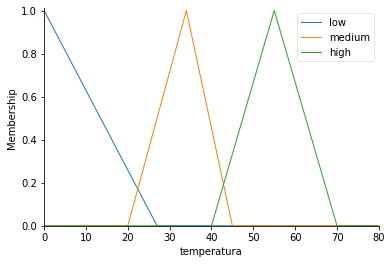

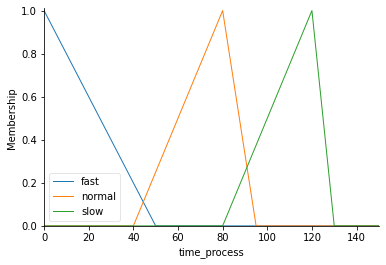

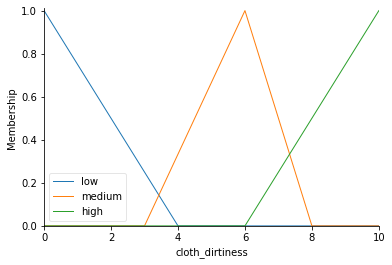

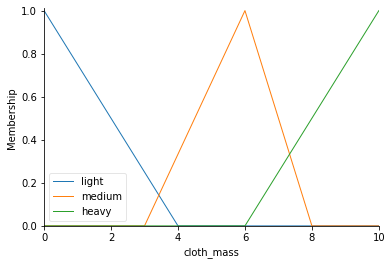

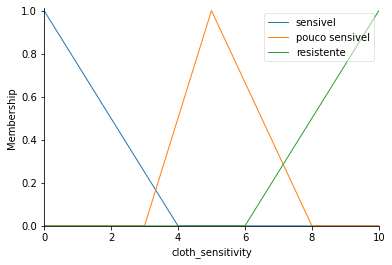

In [ ]:
temperatura.view()
time_process.view()
cloth_dirtiness.view()
cloth_mass.view()
cloth_sensitivity.view()

Regras

regra 1 -  Se a roupa estiver muito suja E for resistente, então a temperatura é alta

regra 2 - Se a roupa estiver meio suja E o peso total for alto OU se a roupa for sensivel, então a temperatura é média

regra 3 - Se a roupa estiver pouco suja E for sensivel OU o peso total alto, então a temperatura é baixa

regra 4 - Se a roupa estiver muito suja E for pouco sensivel E o peso total baixo, então o tempo de ciclo é rapido

regra 5 - Se a roupa estiver meio suja E for pouco sensivel OU o peso total baixo, então o tempo de ciclo é rapido

regra 6 - Se a roupa estiver muito suja E for sensivel E o peso total alto, então o tempo de ciclo é longo

regra 7 - Se a roupa estiver pouco suja E for pouco sensivel E o peso total medio, então o tempo de ciclo é normal

regra 8 - Se a roupa estiver muito suja E for resistente E o peso total medio, então o tempo de ciclo é longo

regra 9 - Se a roupa estiver meio suja E for resistente E o peso total medio, então o tempo de ciclo é normal

regra 10 - Se a roupa estiver meio suja E for resistente E o peso total baixo, então o tempo de ciclo é rápido

regra 11 - Se a roupa estiver pouco suja E for resistente E o peso total medio, então o tempo de ciclo é rapido

regra 12 - Se a roupa estiver meio suja E for sensivel E o peso total alto, então o tempo de ciclo é longo


In [ ]:

rule1 = ctrl.Rule(cloth_dirtiness['high'] & cloth_sensitivity['resistente'], temperatura['high'])
rule2 = ctrl.Rule(cloth_dirtiness['medium'] & cloth_mass['heavy'] | cloth_sensitivity['pouco sensivel'], temperatura['medium'])
rule3 = ctrl.Rule(cloth_dirtiness['low'] & cloth_sensitivity['sensivel'] | cloth_mass['heavy'], temperatura['low'])
rule4 = ctrl.Rule(cloth_dirtiness['high'] & cloth_sensitivity['pouco sensivel'] & cloth_mass['light'], time_process['fast'])
rule5 = ctrl.Rule(cloth_dirtiness['medium'] & cloth_sensitivity['pouco sensivel'] | cloth_mass['light'], time_process['fast'])
rule6 = ctrl.Rule(cloth_dirtiness['high'] & cloth_sensitivity['sensivel'] & cloth_mass['heavy'], time_process['slow'])
rule7 = ctrl.Rule(cloth_dirtiness['low'] & cloth_sensitivity['pouco sensivel'] & cloth_mass['medium'], time_process['normal'])
rule8 = ctrl.Rule(cloth_dirtiness['high'] & cloth_sensitivity['resistente'] & cloth_mass['medium'], time_process['slow'])
rule9 = ctrl.Rule(cloth_dirtiness['medium'] & cloth_sensitivity['resistente'] & cloth_mass['medium'], time_process['normal'])
rule10 =ctrl.Rule(cloth_dirtiness['medium'] & cloth_sensitivity['resistente'] & cloth_mass['light'], time_process['fast'])
rule11 =ctrl.Rule(cloth_dirtiness['low'] & cloth_sensitivity['resistente'] & cloth_mass['medium'], time_process['fast'])
rule12 = ctrl.Rule(cloth_dirtiness['medium'] & cloth_sensitivity['sensivel'] & cloth_mass['heavy'], time_process['slow'])




(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab0db17150>)

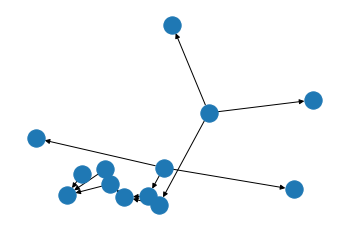

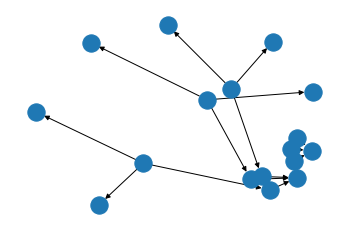

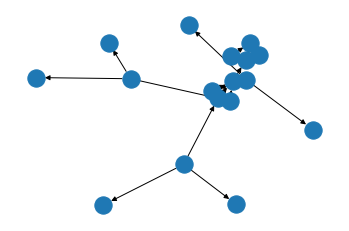

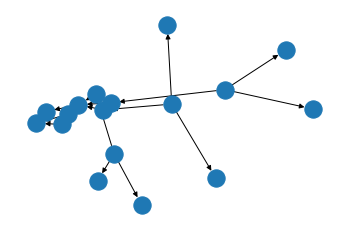

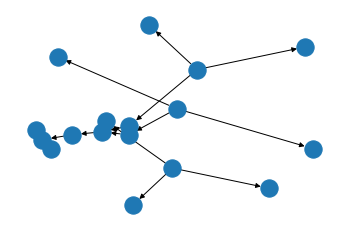

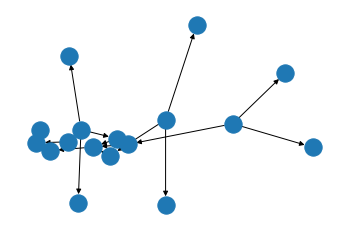

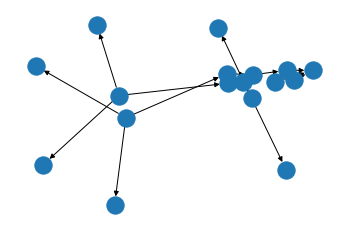

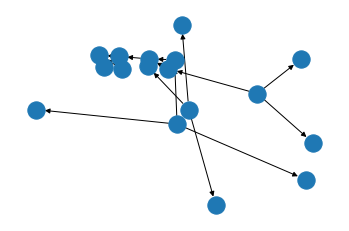

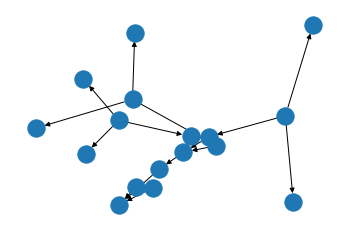

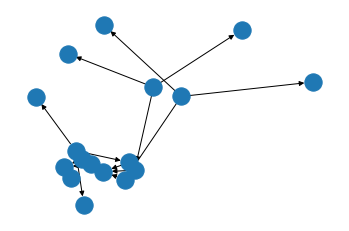

In [ ]:
rule1.view()
rule2.view()
rule3.view()
rule4.view()
rule5.view()
rule6.view()
rule7.view()
rule8.view()
rule9.view()
rule10.view()


Criando o sistemas de regras e de controle (ControlSystem)

Essas são as funções que irão verificar os antecedentes das 12 regras e verificar o quão verdadeiros eles são, retornando os valores de pertinência para os seus consequentes. O valor retornado é uma agregação que equivale ao valor final.

In [ ]:
#São passadas as 12 regras
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
#Essa função produz o resultado do pipeline de execução do sistema Fuzzy
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Simulação do Sistema de Controle

Especifique as entradas:

In [ ]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['cloth_dirtiness'] = 9
tipping.input['cloth_mass'] = 1
tipping.input['cloth_sensitivity']= 4

In [ ]:
tipping.compute( )

Plot do gráfico final da variavel temperatura 

32.833333333333336


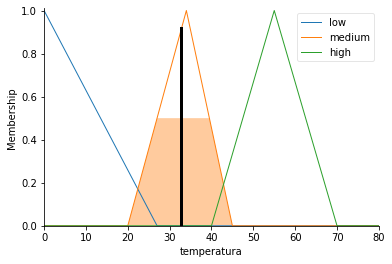

In [ ]:
print(tipping.output['temperatura'])
temperatura.view(sim=tipping)
plt.show()


17.499999999999996


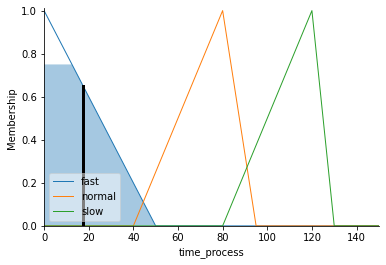

In [ ]:
print(tipping.output['time_process'])
time_process.view(sim=tipping)
plt.show()